<a href="https://colab.research.google.com/github/Neeraj577/Machine_learning/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle dataset Muffin vs chihuahua

usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [7]:
!kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification
License(s): CC0-1.0
 92% 435M/474M [00:04<00:00, 54.6MB/s]
100% 474M/474M [00:04<00:00, 120MB/s] 


In [9]:
! unzip /content/muffin-vs-chihuahua-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/muffin/img_2_671.jpg  
  inflating: test/muffin/img_2_681.jpg  
  inflating: test/muffin/img_2_689.jpg  
  inflating: test/muffin/img_2_709.jpg  
  inflating: test/muffin/img_2_721.jpg  
  inflating: test/muffin/img_2_73.jpg  
  inflating: test/muffin/img_2_735.jpg  
  inflating: test/muffin/img_2_752.jpg  
  inflating: test/muffin/img_2_757.jpg  
  inflating: test/muffin/img_2_762.jpg  
  inflating: test/muffin/img_2_767.jpg  
  inflating: test/muffin/img_2_78.jpg  
  inflating: test/muffin/img_2_784.jpg  
  inflating: test/muffin/img_2_799.jpg  
  inflating: test/muffin/img_2_8.jpg  
  inflating: test/muffin/img_2_810.jpg  
  inflating: test/muffin/img_2_819.jpg  
  inflating: test/muffin/img_2_82.jpg  
  inflating: test/muffin/img_2_821.jpg  
  inflating: test/muffin/img_2_824.jpg  
  inflating: test/muffin/img_2_827.jpg  
  inflating: test/muffin/img_2_838.jpg  
  inflating: test/muffin/img_2_857.jpg  
  inflating

In [10]:
#importing the packages
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn

import torchvision
from torchvision import datasets, models, transforms

import time
import os
import copy

In [11]:
#setting a seeds

torch.manual_seed(0)
torch.backends.cudnn.deterministic= True
torch.backends.cudnn.benchmark=False

In [12]:
device = torch.device('cuda' if torch.cuda.is_available else "cpu")

In [29]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'value': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [30]:
#providing data directory
data_dir = '/content/Data'

#creating Image folder for our training annd validating data

images_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                           data_transforms[x])
                  for x in ['train', 'value']}
#get datset sizes for image_dataset
dataset_sizes = {x: len(images_datasets[x]) for x in ['train', 'value']}

# get classname from images_datsets
class_name = images_datasets['train'].classes

#use images_dataset to sample from the dataset
dataloaders =  {x: torch.utils.data.DataLoader(images_datasets[x], batch_size=4, shuffle=True)
                for x in ['train', 'value']}

In [31]:
#change selected device to CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [32]:
def image_show(inp, title=None):
  # use numpy transpose to get images into correct shape
  inp = inp.numpy().transpose((1, 2, 0))

  #useing default values for mean and std
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])

  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)

  plt.imshow(inp)
  if title is not None:
    plt.title(title)
  plt.pause(0.001)

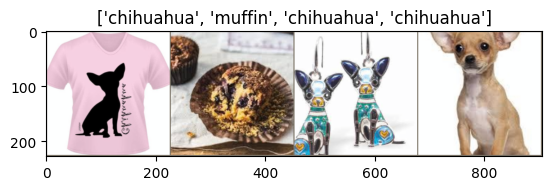

In [34]:
#get a batch of training data
inputs, classes =  next(iter(dataloaders['train']))

#make grid from batch
out = torchvision.utils.make_grid(inputs)

#plot the grid with a title that concatennates all trhe class labels
image_show(out, title=[class_name[x] for x in classes])

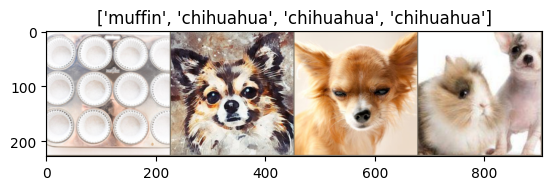

In [35]:
#get a batch of training data
inputs, classes =  next(iter(dataloaders['train']))

#make grid from batch
out = torchvision.utils.make_grid(inputs)

#plot the grid with a title that concatennates all trhe class labels
image_show(out, title=[class_name[x] for x in classes])